<a href="https://colab.research.google.com/github/jeibloo/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

np.random.seed(seed=42)
coinflips = np.random.binomial(n=1,p=.5,size=100)
coinflips

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [0]:
### getting a higher sample mean with confidence being .99 means the confidence intervals have to be wider
### to capture everything.
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean , mean-interval, mean+interval)

#confidence_interval(coinflips)

(0.47, 0.3704689875017368, 0.5695310124982632)

In [0]:
#### THIS ONE LINE OF CODE ON SPRINT
bayes_mean_CI, _, _ = stats.bayes_mvs(coinflips,alpha=.95)
bayes_mean_CI

Mean(statistic=0.47, minmax=(0.37046898750173674, 0.5695310124982632))

In [0]:
??stats.bayes_mvs

In [0]:
coinflips_mean_dist,_,_ = stats.mvsdist(coinflips)
coinflips_mean_dist

In [0]:
coinflips_mean_dist.rvs(1000)

array([0.47447628, 0.51541425, 0.54722018, 0.4589882 , 0.51501386,
       0.53819192, 0.43382292, 0.53546659, 0.47026173, 0.44967562,
       0.4621107 , 0.42691904, 0.37324325, 0.47531437, 0.46052277,
       0.48711257, 0.52456771, 0.43332181, 0.49545882, 0.44671454,
       0.47520117, 0.47047251, 0.41828918, 0.50159477, 0.42965501,
       0.45273383, 0.48045849, 0.45342529, 0.48238344, 0.53966291,
       0.48230241, 0.48073422, 0.48553525, 0.47962228, 0.41274185,
       0.42892633, 0.5170948 , 0.42678096, 0.42249309, 0.51499109,
       0.47059199, 0.39903942, 0.41790336, 0.46406817, 0.42232382,
       0.42163269, 0.47848227, 0.48232842, 0.4731858 , 0.51077244,
       0.3957508 , 0.48504646, 0.49014295, 0.53252732, 0.45495376,
       0.47883978, 0.60393033, 0.4492549 , 0.44797902, 0.54782121,
       0.43380002, 0.5760073 , 0.36941266, 0.44467418, 0.4939245 ,
       0.45278835, 0.55635162, 0.48695459, 0.39080983, 0.45948606,
       0.2941779 , 0.35950718, 0.44805696, 0.4725126 , 0.42218

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

###1). Calculate

In [0]:
# Ayo code
prob_drunk_given_positive = lambda probDrPr,probPos,probPosDr: (probPos*probDrPr)/probPosDr
prob_drunk_given_positive(0.001,1,0.08)

0.0125

###2). Explore & Experiment!

In [0]:
## import, clean, and see data
import pandas as pd
import numpy as np
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
column_names = ['party','hInfant_bill','waterProject_bill','budgetAdopt_bill',
                'physc_payFrz_bill','elSalv_bill','relgGrp_school_bill',
                'antiSat_ban_bill','contrasAid_bill','mxMis_bill','immigrt_bill',
                'synfuels_cut_bill','education_bill','superfundSue_bill',
                'crime_bill','dutyFree_bill','exportAdmin_SA_bill']
# It comes with no headers
df = pd.read_csv('./house-votes-84.data',names=column_names)
df_clean = df.copy()
df_clean = df.replace({'?':np.nan,'n':0,'y':1})
dem = df_clean[df_clean.party == 'democrat']
rep = df_clean[df_clean.party == 'republican']

--2019-07-24 20:04:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.5’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-07-24 20:04:10 (591 KB/s) - ‘house-votes-84.data.5’ saved [18171/18171]



In [0]:
df_clean.head(5)

,party,hInfant_bill,waterProject_bill,budgetAdopt_bill,physc_payFrz_bill,elSalv_bill,relgGrp_school_bill,antiSat_ban_bill,contrasAid_bill,mxMis_bill,immigrt_bill,synfuels_cut_bill,education_bill,superfundSue_bill,crime_bill,dutyFree_bill,exportAdmin_SA_bill
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Mean(statistic=0.6046511627906976, minmax=(0.5445926997425515, 0.6647096258388437))


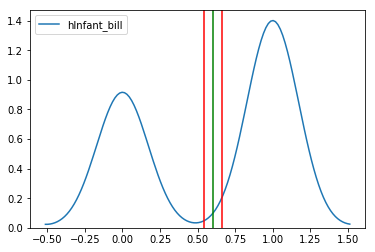

In [0]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

test = democrat['hInfant_bill'].dropna()
bayes_mean_CI,_,_ = stats.bayes_mvs(test,alpha=0.95)
print(bayes_mean_CI)

sns.kdeplot(test);
plt.axvline(x=bayes_mean_CI[1][0], color='red')
plt.axvline(x=bayes_mean_CI[1][1], color='red')
plt.axvline(x=bayes_mean_CI[0], color='green')

Lookin' familiar 

###3). Create visualization between bayesian & traditional

In [0]:
import matplotlib.pyplot as plt
from scipy.stats import t

## Classic Allred function...CLASSIC
n = len(test)
mean = test.mean()
sample_std = test.std()
std_err = sample_std/n**.5
regular_CI = t.interval(.95,n-1,loc=mean,scale=std_err)
print("95% CI:",regular_CI)

95% CI: (0.5445926997425515, 0.6647096258388437)


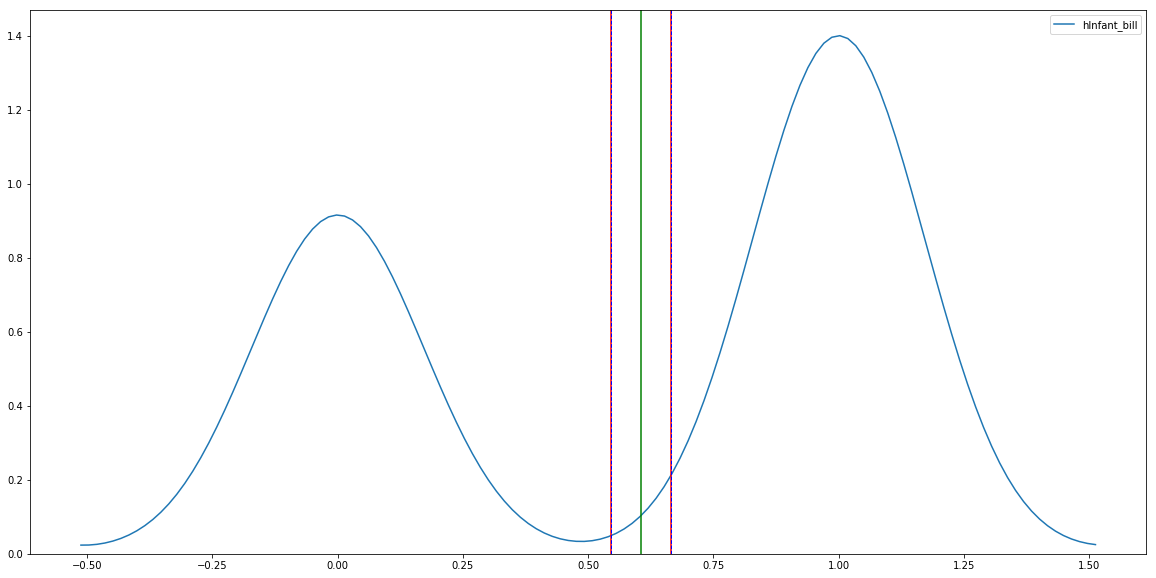

In [0]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.kdeplot(ax=ax, data=test);
plt.axvline(x=bayes_mean_CI[1][0], color='red')
plt.axvline(x=bayes_mean_CI[1][1], color='red')
plt.axvline(x=bayes_mean_CI[0], color='green')
plt.axvline(x=regular_CI[0], color='blue', alpha=1,linewidth=1,linestyle='--')
plt.axvline(x=regular_CI[1], color='blue', alpha=1,linewidth=1,linestyle='--')

###4). Summarize diff between Bayesian & Frequentist



Frequentist Stats: Using a frequency of something occuring, that frequency is generally the only thing I'm considering in this scenario.

Bayesian Stats: I'm using the frequency of something happening, but I'm also taking into consideration assumptions about the subject that've been made before.

-- Bayesian takes prior observation/inferences into account, frequentist can too, but usually do not.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)